In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d



<ErrorbarContainer object of 3 artists>

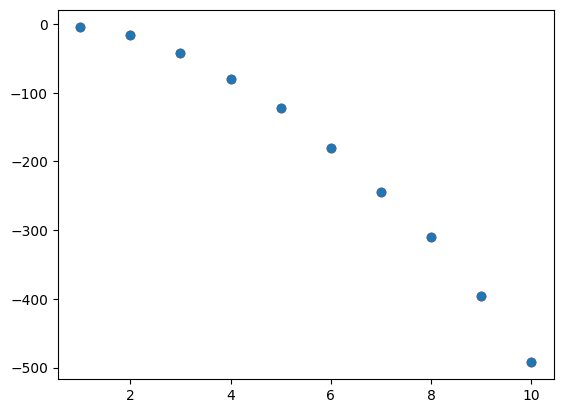

In [9]:

g_god = 9.82
god_c =  0
x_data = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0,7.0,8.0,9.0,10.0])
y_data = -g_god*0.5 * x_data**2 + god_c
y_data = y_data + np.random.normal(0, 3, len(x_data))
e_data = 0.1
plt.plot(x_data, y_data, 'ro')
plt.errorbar(x_data, y_data, yerr=e_data, fmt='o')



 

In [10]:
def model_fit(fffsahbdfkjshdbghjksag,g):
    tmax = 10
    t = 0
    dt = .1
    y_list = []
    t_list = []
    y = 0
    vel = 0
    while t < tmax+dt:
        y_list.append(y)
        t_list.append(t)
        vel += -g*dt
        y += vel*dt
        t += dt
        
        

    inter_op = interp1d(t_list, y_list, kind='cubic')
    y_data_fit = inter_op(x_data)

    return y_data_fit

        
        

def jo(x,a,b,c):
    return "hej"
    

In [11]:

jo(1,2,3,4)


'hej'

9.707297282542761
0.0012417368878726684


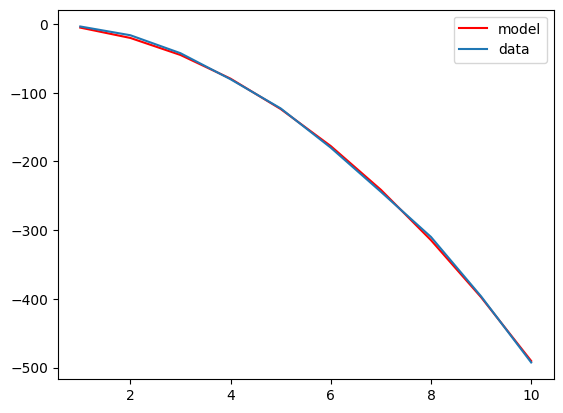

In [12]:
par,cov = curve_fit(model_fit, x_data, y_data, sigma = e_data*np.ones(len(x_data)), absolute_sigma=True)

plt.plot(x_data, model_fit(x_data, *par), 'r-', label = 'model')
plt.plot(x_data, y_data, label = 'data')
plt.legend()
print(par[0])
print(np.sqrt(cov[0][0]))








Indices of minimum value: (172,)
Minimum value: 6895.153645745956
g at minimum: 9.707286432160805
uncertanity on g: 0.0011557788944731584


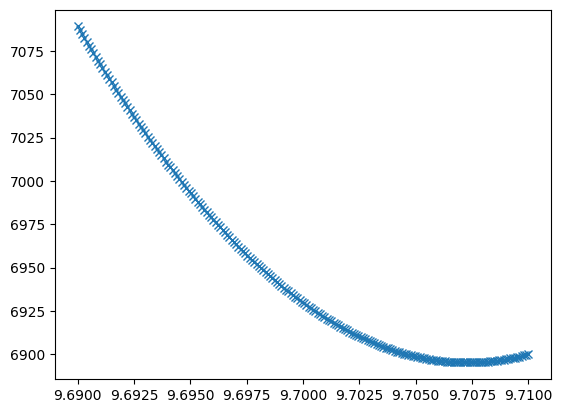

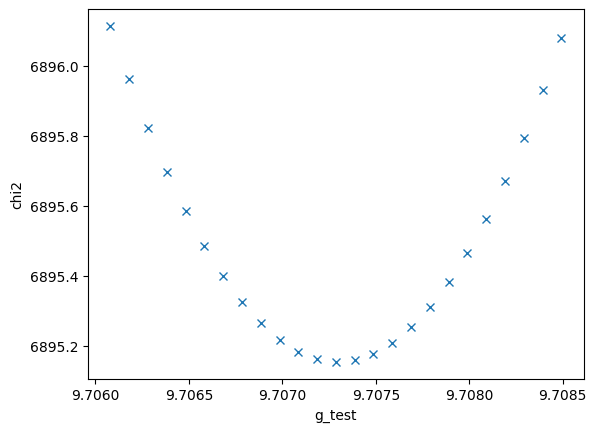

In [14]:
N = 200
g_test = np.linspace(9.69,9.71,N)
chi2 = np.ones(N)
for i in range(N):
        chi2[i] = np.sum(((y_data - model_fit(x_data, g_test[i]))**2)/e_data**2)

min_index = np.unravel_index(np.argmin(chi2), chi2.shape)
plt.plot(g_test, chi2, 'x')
print("Indices of minimum value:", min_index)
print("Minimum value:", chi2[min_index])
print("g at minimum:", g_test[min_index[0]])
a = chi2
mask_a = (a < chi2[min_index] + 1)
plt.figure()
plt.plot(g_test[mask_a], a[mask_a], 'x')
plt.ylabel('chi2')
plt.xlabel('g_test')
print("uncertanity on g:",(g_test[mask_a][-1]-g_test[mask_a][1])/2)
